# 1.- Sueldos 

In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import pandas as pd
import requests
import os
import lxml.html as lh

In [2]:
sueldos  = pd.read_excel('/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Trabajos/tabulador_pe2019.xls',header=9)

In [3]:
sueldos

,NIVEL,TIPO,PUESTO,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE,SUELDO MENSUAL NETO,PRIMA VACACIONAL,AGUINALDO
0,22,NaN,GOBERNADOR/A DEL ESTADO,59804.327930,5843.070000,1913.1,25897,64294.837780,75373.99,233126.325711,69584.321342,5082.660000,760.410000,157698.934369,10 Días por Año,45 Días por Año
1,20,NaN,SECRETARIO/A DE ESTADO A,49025.945517,5843.070000,1913.1,22783,48858.839699,67187.62,195611.575216,56829.306173,5082.660000,760.410000,132939.199042,10 Días por Año,45 Días por Año
2,19,NaN,DIRECTOR/A GENERAL PARAESTATAL A,40685.951590,5843.070000,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.660000,760.410000,108033.486450,10 Días por Año,45 Días por Año
3,19,NaN,SECRETARIO/A DE ESTADO B,40685.951590,5843.070000,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.660000,760.410000,108033.486450,10 Días por Año,45 Días por Año
4,18,NaN,SECRETARIO/A DE ESTADO C,37083.708634,5843.070000,1913.1,16756,35924.238404,42651.90,140172.017038,37979.856393,5082.660000,760.410000,96349.090645,10 Días por Año,45 Días por Año
5,18,NaN,SUBSECRETARIO/A A,37083.708634,5843.070000,1913.1,16756,35924.238404,42651.90,140172.017038,37979.856393,5082.660000,760.410000,96349.090645,10 Días por Año,45 Días por Año
6,18,NaN,DIRECTOR/A GENERAL PARAESTATAL B,37083.708634,5843.070000,1913.1,16756,35924.238404,42651.90,140172.017038,37979.856393,5082.660000,760.410000,96349.090645,10 Días por Año,45 Días por Año
7,17,NaN,SUBSECRETARIO/A B,36196.185147,5843.070000,1913.1,15006,29739.459369,35311.60,124009.414516,32484.571535,5082.660000,760.410000,85681.772980,10 Días por Año,45 Días por Año
8,17,NaN,DIRECTOR/A GENERAL PARAESTATAL C,36196.185147,5843.070000,1913.1,15006,29739.459369,35311.60,124009.414516,32484.571535,5082.660000,760.410000,85681.772980,10 Días por Año,45 Días por Año
9,16,NaN,SUBSECRETARIO/A C,29462.206543,5621.674080,1913.1,10471,26559.244848,33446.67,107473.895470,26937.769673,4861.264080,760.410000,74914.451718,10 Días por Año,45 Días por Año


#### ¿Cuál es promedio de las contribuciones del sueldo de un trabajador en esta dependencia?

In [4]:
sueldos.describe()['SUELDO MENSUAL BRUTO']['mean']

49467.3759351061

In [5]:
sueldos.describe()['SUELDO MENSUAL NETO']['mean']

35829.35357437968

#### ¿Media y  Moda de las contribuciones del sueldo de un trabajador ? Rango interquartil de la distribución. 

In [6]:
sueldos['SUELDO MENSUAL NETO'].mode()

0    8294.835952
1    9609.786902
dtype: float64

In [7]:
sueldos.describe()['SUELDO MENSUAL NETO'].loc['25%':]

25%     10289.592141
50%     22078.225282
75%     50363.213596
max    157698.934369
Name: SUELDO MENSUAL NETO, dtype: float64

#### ¿Cuál es la dispersión de sueldos?

In [8]:
mediana_SN = sueldos['SUELDO MENSUAL NETO'].median()
print(mediana_SN)

22078.22528193275


In [9]:
minimo =  sueldos.describe()['SUELDO MENSUAL BRUTO'].loc['min']
maximo =  sueldos.describe()['SUELDO MENSUAL BRUTO'].loc['max']
q_1 = sueldos.describe()['SUELDO MENSUAL BRUTO'].loc['25%']
q_2 = sueldos.describe()['SUELDO MENSUAL BRUTO'].loc['50%']
q_3 = sueldos.describe()['SUELDO MENSUAL BRUTO'].loc['75%']

In [10]:
sigma_mas = q_3-q_2
sigma_menos = q_2-q_1
print('+',sigma_mas)
print('-',sigma_menos)

+ 42092.61300798985
- 15794.637487885968


In [11]:
minimo =  sueldos.describe()['SUELDO MENSUAL NETO'].loc['min']
maximo =  sueldos.describe()['SUELDO MENSUAL NETO'].loc['max']
q_1 = sueldos.describe()['SUELDO MENSUAL NETO'].loc['25%']
q_2 = sueldos.describe()['SUELDO MENSUAL NETO'].loc['50%']
q_3 = sueldos.describe()['SUELDO MENSUAL NETO'].loc['75%']

In [12]:
sigma_mas = q_3-q_2
sigma_menos = q_2-q_1
print('+',sigma_mas)
print('-',sigma_menos)

+ 28284.98831381275
- 11788.633140679867


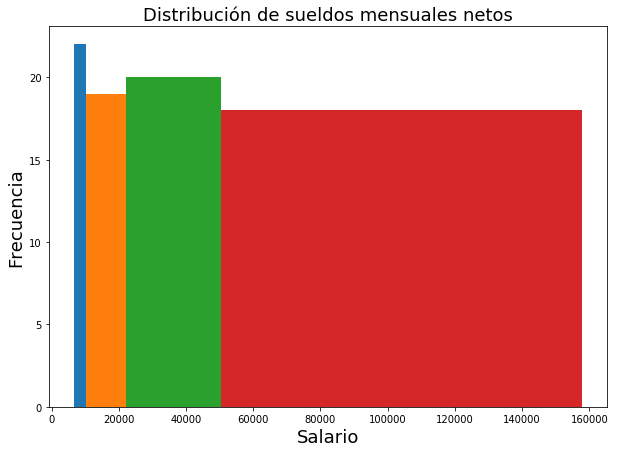

In [13]:
q_1 = sueldos.describe()['SUELDO MENSUAL NETO'].loc['25%']
plt.figure(figsize=(10, 7))
plt.hist(sueldos['SUELDO MENSUAL NETO'],bins = 1,range=[minimo, q_1]);
plt.hist(sueldos['SUELDO MENSUAL NETO'],bins = 1,range=[q_1+1, q_2]);
plt.hist(sueldos['SUELDO MENSUAL NETO'],bins = 1,range=[q_2+1, q_3]);
plt.hist(sueldos['SUELDO MENSUAL NETO'],bins = 1,range=[q_3+1, maximo])
plt.title('Distribución de sueldos mensuales netos',fontsize  =18)
plt.xlabel('Salario',fontsize  =18)
plt.ylabel('Frecuencia',fontsize  =18)
plt.savefig('/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/REPORTE_DE_DATOS/SUELDOS/DSM_neto.jpg');

#### ¿Cuál es el sueldo base máximo? 

In [14]:
sueldos.describe()['SUELDO BASE'].loc['max']

59804.3279302758

#### ¿Cuál es el sueldo base mínimo?

In [15]:
sueldos.describe()['SUELDO BASE'].loc['min']

3080.4

#### Porcentaje relativo de cada una de las componentes del sueldo mensual neto en cada uno de los puestos

In [16]:
sueldos['%SUELDO NETO'] = np.round(100*sueldos['IMPTO MENSUAL']/np.sum(sueldos['IMPTO MENSUAL']),2)

In [17]:
sueldos.loc[:,['PUESTO','%SUELDO NETO']].to_csv('/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/REPORTE_DE_DATOS/SUELDOS/SUELDE_NETO_100.csv')

#### ¿De cuánto dinero es la diferencia entre el sueldo neto mayor (gobernador del estado) y el sueldo de otros empleados (por ejemplo, alguien de nivel 1, que es el nivel más bajo en la tabla)?

In [18]:
sueldos['DSN'] = np.round(np.max(sueldos['SUELDO MENSUAL NETO']) - sueldos['SUELDO MENSUAL NETO'],4)

In [19]:
sueldos.loc[:,['PUESTO','SUELDO MENSUAL NETO','DSN']].to_csv('/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/REPORTE_DE_DATOS/SUELDOS/DIF_SUELDOS.csv')

#### ¿Qué porcentaje se da de apoyo en sus diferentes modalidades para cada uno? 

In [20]:
apoyo = []
for i in range(len(sueldos.PUESTO)):
    Ayuda_T = np.sum(sueldos.iloc[i][['CUOTAS SEGURIDAD SOCIAL','PREVISIÓN SOCIAL','AYUDA X SERVICIOS','APOYO FAMILIAR','GRATIFICACIÓN QUINCENAL']])
    apoyo.append(Ayuda_T)

In [21]:
sueldos['APOYO TOTAL'] = np.round(apoyo,3)
sueldos['%APOYO TOTAL'] = np.round(100*sueldos['APOYO TOTAL']/np.sum(apoyo),2)

In [22]:
sueldos.loc[:,['PUESTO','APOYO TOTAL','%APOYO TOTAL']].to_csv('/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/REPORTE_DE_DATOS/SUELDOS/APOYO_100.csv')

In [23]:
sueldos.loc[:,['PUESTO','%SUELDO NETO']]
sueldos.loc[:,['PUESTO','SUELDO MENSUAL NETO','DSN']]
sueldos.loc[:,['PUESTO','APOYO TOTAL','%APOYO TOTAL']]

,PUESTO,APOYO TOTAL,%APOYO TOTAL
0,GOBERNADOR/A DEL ESTADO,173321.998,6.26
1,SECRETARIO/A DE ESTADO A,146585.630,5.30
2,DIRECTOR/A GENERAL PARAESTATAL A,117189.695,4.23
3,SECRETARIO/A DE ESTADO B,117189.695,4.23
4,SECRETARIO/A DE ESTADO C,103088.308,3.72
5,SUBSECRETARIO/A A,103088.308,3.72
6,DIRECTOR/A GENERAL PARAESTATAL B,103088.308,3.72
7,SUBSECRETARIO/A B,87813.229,3.17
8,DIRECTOR/A GENERAL PARAESTATAL C,87813.229,3.17
9,SUBSECRETARIO/A C,78011.689,2.82


In [24]:
tabla_f_suerldos = sueldos.loc[:,['PUESTO','APOYO TOTAL','%APOYO TOTAL']].merge(sueldos.loc[:,['PUESTO','%SUELDO NETO']].merge(sueldos.loc[:,['PUESTO','SUELDO MENSUAL NETO','DSN']]))

In [25]:
np.round(tabla_f_suerldos,2).to_csv('/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/REPORTE_DE_DATOS/SUELDOS/tabla_sueldos.csv')

#### ¿Cuanto dinero es gastado en es ISSSTE entre todos los puestos?

In [26]:
print('TOTAL EN EL ISSSTE = ',np.sum(sueldos['ISSSTE']))
print('TOTAL EN EL ISSEG = ',np.sum(sueldos['ISSEG']))

TOTAL EN EL ISSSTE =  29411.26871446277
TOTAL EN EL ISSEG =  172122.23464139525


# 2.- Temperaturas y Precipitaciones

## Precipitación:

In [27]:
path_ll_18 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/CONAGUA/2018/lluvias/201801010000Lluv.csv'
path = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/CONAGUA/2018/lluvias/'
folder = os.fsencode(path)
lluvias_2018 = pd.read_csv(path_ll_18,encoding='latin-1')
for file in os.listdir(folder):
    filename = os.fsdecode(file)
    mes = pd.read_csv(path+filename,encoding='latin-1')
    if 'EDO' in mes.keys():
        mes = mes.rename(columns={'EDO':'ESTADO'}) 
        lluvias_2018 = pd.merge(lluvias_2018,mes)
    else:
        lluvias_2018 = pd.merge(lluvias_2018,mes)

lluvias_2018 = lluvias_2018.drop(['Unnamed: 6'], axis=1)
lluvias_2018 = lluvias_2018.drop(['Unnamed: 7'], axis=1)
lluvias_2018 = lluvias_2018.drop(['Unnamed: 8'], axis=1)
lluvias_2018 = lluvias_2018.drop(['Unnamed: 9'], axis=1)
lluvias_2018 = lluvias_2018.drop(['Unnamed: 10'], axis=1)

#Acmodamos y renombramos
lluvias_2018  = lluvias_2018 [['LON','LAT','ESTADO','CLAVE_SIH','NOMBRE','ENE',
                              'FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC']]
lluvias_2018 = lluvias_2018.rename(columns={'LON':'Lon','LAT':'Lat','ESTADO':'Edo','CLAVE_SIH':'Clave','NOMBRE':'Est'}) 
#Mostramos los datos
lluvias_2018.head()

,Lon,Lat,Edo,Clave,Est,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags.",25.8,28.7,0.00,0.0,75.4,112.50,34.5,128.2,111.43,119.54,47.14,0.60
1,-102.466944,22.188611,AGS,ANVAG,"Cincuenta Aniversario, Ags.",58.6,24.4,0.00,2.6,34.8,191.20,28.8,63.4,67.20,109.80,31.80,0.00
2,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",56.0,19.5,0.00,5.3,15.4,201.50,108.0,78.3,130.07,100.76,21.66,7.25
3,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",50.0,30.0,0.00,0.0,39.0,250.00,110.5,80.4,178.20,113.00,30.00,13.50
4,-102.000000,21.896389,AGS,CNSAG,"Los Conos, Ags.",51.5,33.0,0.01,106.3,39.0,289.11,64.4,129.8,190.74,65.33,54.50,0.01


In [28]:
np.round(lluvias_2018,2).to_csv('/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/REPORTE_DE_DATOS/TyLL/lluvias_2018.csv')

In [29]:
path_ll_19 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/CONAGUA/2019/lluvias/201901010000Lluv.csv'
path = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/CONAGUA/2019/lluvias/'
folder = os.fsencode(path)
lluvias_2019 = pd.read_csv(path_ll_19,encoding='latin-1')
for file in os.listdir(folder):
    filename = os.fsdecode(file)
    mes = pd.read_csv(path+filename,encoding='latin-1')
    if 'ESTADO' in mes.keys():
        mes = mes.rename(columns={'ESTADO':'EDO'}) 
        lluvias_2019 = pd.merge(lluvias_2019,mes)
    else:
        lluvias_2019 = pd.merge(lluvias_2019,mes)

#Acmodamos y renombramos
lluvias_2019  = lluvias_2019 [['LON','LAT','EDO','CLAVE_SIH','NOMBRE','ENE',
                              'FEB','MAR','ABR','MAY','JUN','JUL','AGO']]
lluvias_2019 = lluvias_2019.rename(columns={'LON':'Lon','LAT':'Lat','EDO':'Edo','CLAVE_SIH':'Clave','NOMBRE':'Est'}) 
#Mostramos los datos        
lluvias_2019.head()

,Lon,Lat,Edo,Clave,Est,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO
0,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",18.17,0.0,0.00,0.0,5.32,101.27,18.3,105.47
1,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",16.70,0.0,0.00,0.0,0.00,35.00,139.0,156.30
2,-102.000000,21.896389,AGS,CNSAG,"Los Conos, Ags.",13.20,0.0,2.31,0.0,3.22,46.72,100.4,160.73
3,-102.296667,22.362778,AGS,CSOAG,"Cosío, Ags.",7.20,0.0,0.30,0.0,12.00,17.28,39.3,40.33
4,-102.356944,22.121667,AGS,JCQAG,"Jocoque, Ags.",6.30,0.0,0.00,0.0,5.00,24.32,43.1,108.32


In [30]:
np.round(lluvias_2019,2).to_csv('/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/REPORTE_DE_DATOS/TyLL/lluvias_2019.csv')

In [31]:
lluvias = pd.concat([lluvias_2018.loc[:,:'AGO'], lluvias_2019], keys=['2018', '2019'],sort=False)

#### Diferencia entre la precipitación media entre 2018 y 2019

In [32]:
dif_lluv_edo_mes = np.round(lluvias[:'2019'].groupby('Edo').mean().loc[:,'ENE':'AGO']-lluvias[:'2018'].groupby('Edo').mean().loc[:,'ENE':'AGO'],2)
dif_lluv_edo_mes.to_csv('/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/REPORTE_DE_DATOS/TyLL/dif_lluv_edo_mes.csv')
dif_lluv_edo_mes

,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO
Edo,,,,,,,,
AGS,-16.61,-16.81,0.21,-10.47,-20.04,-110.09,7.44,24.08
BC,-5.41,22.93,-0.52,1.54,6.09,0.02,-0.52,-0.05
BCS,6.62,-4.12,1.30,0.00,0.00,-33.62,-0.88,-1.00
CAMP,-50.11,-5.44,22.16,-50.00,37.55,46.18,-13.57,-111.62
CHIH,10.66,-4.28,4.91,-0.34,-2.01,-15.66,-8.35,-10.14
CHIS,-45.86,26.03,7.79,-54.38,56.64,43.70,44.97,20.60
COAH,2.88,-2.22,4.67,9.14,24.90,32.37,-10.29,-11.65
COL,-0.94,-0.69,0.01,0.00,-5.69,-74.92,55.15,-22.15
DF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Estado con mayor precipitación (o cuál tiene la menor) en base a los datos proporcionados
Lo hice por año

In [75]:
preT_2018_estado = lluvias[:'2018'].groupby('Edo').mean().loc[:,'ENE':'AGO'].T.sum()
n_max = np.where(preT_2018_estado == max(preT_2018_estado))[0][0]
edo_max_18 = preT_2018_estado.keys()[n_max]

In [76]:
preT_2019_estado = lluvias[:'2019'].groupby('Edo').mean().loc[:,'ENE':'AGO'].T.sum()
n_max = np.where(preT_2019_estado == max(preT_2019_estado))[0][0]
edo_max_19 = preT_2019_estado.keys()[n_max]

In [77]:
print('El estado de',edo_max_18,'tiene la mayor presipitación en todo el año de 2018 con ', preT_2018_estado[n_max])

El estado de CAMP tiene la mayor presipitación en todo el año de 2018 con  949.8458064516129


In [78]:
print('El estado de',edo_max_19,'tiene la mayor presipitación en todo el año de 2019 con ', preT_2019_estado[n_max])

El estado de CHIS tiene la mayor presipitación en todo el año de 2019 con  1049.3323617021276


In [79]:
n_min = np.where(preT_2018_estado == min(preT_2018_estado))[0][0]
edo_min_18 = preT_2018_estado.keys()[n_min]

In [80]:
print('El estado de',edo_min_18,'tiene la menor presipitación en todo el año de 2018 con ', preT_2018_estado[n_min])

El estado de BC tiene la menor presipitación en todo el año de 2018 con  68.95800000000003


In [81]:
n_min = np.where(preT_2019_estado == min(preT_2019_estado))[0][0]
edo_min_19 = preT_2019_estado.keys()[n_min]

In [82]:
print('El estado de',edo_min_19,'tiene la menor presipitación en todo el año de 2019 con ', preT_2019_estado[n_min])

El estado de BC tiene la menor presipitación en todo el año de 2019 con  93.04625000000001


#### ¿Cuáles son los estados con la precipitación más baja en determinado mes/año?

In [83]:
mes = ['ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO']
edo_max_mes = []
n_max_mes = []

for i in range(len(mes)):
    preT_mes_estado = lluvias[:'2018'].groupby('Edo').mean().loc[:,mes[i]]
    n_max = np.where(preT_mes_estado == max(preT_mes_estado))[0][0]
    edo_max = preT_mes_estado.keys()[n_max]
    n_max_mes.append(max(preT_mes_estado))
    edo_max_mes.append(edo_max)

In [84]:
for i in range(len(mes)):
    print('El estado de',edo_max_mes[i],'tiene la mayor presipitación en el mes de',mes[i],'2018 con', n_max_mes[i])

El estado de TAB tiene la mayor presipitación en el mes de ENE 2018 con 320.3
El estado de TAB tiene la mayor presipitación en el mes de FEB 2018 con 46.300000000000004
El estado de VER tiene la mayor presipitación en el mes de MAR 2018 con 69.07846153846154
El estado de CAMP tiene la mayor presipitación en el mes de ABR 2018 con 112.12
El estado de QROO tiene la mayor presipitación en el mes de MAY 2018 con 194.76000000000002
El estado de MOR tiene la mayor presipitación en el mes de JUN 2018 con 350.376
El estado de NAY tiene la mayor presipitación en el mes de JUL 2018 con 258.45
El estado de NAY tiene la mayor presipitación en el mes de AGO 2018 con 327.20000000000005


In [85]:
mes = ['ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO']
edo_max_mes = []
n_max_mes = []

for i in range(len(mes)):
    preT_mes_estado = lluvias['2019':].groupby('Edo').mean().loc[:,mes[i]]
    n_max = np.where(preT_mes_estado == max(preT_mes_estado))[0][0]
    edo_max = preT_mes_estado.keys()[n_max]
    n_max_mes.append(max(preT_mes_estado))
    edo_max_mes.append(edo_max)

In [86]:
for i in range(len(mes)):
    print('El estado de',edo_max_mes[i],'tiene la mayor presipitación en el mes de',mes[i],'2019 con', n_max_mes[i])

El estado de TAB tiene la mayor presipitación en el mes de ENE 2019 con 158.56071428571428
El estado de QROO tiene la mayor presipitación en el mes de FEB 2019 con 124.13000000000001
El estado de TAB tiene la mayor presipitación en el mes de MAR 2019 con 98.79999999999998
El estado de QROO tiene la mayor presipitación en el mes de ABR 2019 con 79.5775
El estado de CHIS tiene la mayor presipitación en el mes de MAY 2019 con 206.7615873015873
El estado de CHIS tiene la mayor presipitación en el mes de JUN 2019 con 286.73396825396827
El estado de NAY tiene la mayor presipitación en el mes de JUL 2019 con 236.48333333333335
El estado de CHIS tiene la mayor presipitación en el mes de AGO 2019 con 256.46939682539687


In [87]:
mes = ['ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO']
edo_max_mes = []
n_max_mes = []

for i in range(len(mes)):
    preT_mes_estado = lluvias[:'2018'].groupby('Edo').mean().loc[:,mes[i]]
    n_max = np.where(preT_mes_estado == min(preT_mes_estado))[0][0]
    edo_max = preT_mes_estado.keys()[n_max]
    n_max_mes.append(min(preT_mes_estado))
    edo_max_mes.append(edo_max)

In [88]:
for i in range(len(mes)):
    print('El estado de',edo_max_mes[i],'tiene la menor presipitación en el mes de',mes[i],'2018 con', n_max_mes[i])

El estado de CHIH tiene la menor presipitación en el mes de ENE 2018 con 0.0
El estado de GRO tiene la menor presipitación en el mes de FEB 2018 con 1.1722222222222223
El estado de COL tiene la menor presipitación en el mes de MAR 2018 con 0.0
El estado de BCS tiene la menor presipitación en el mes de ABR 2018 con 0.0
El estado de BCS tiene la menor presipitación en el mes de MAY 2018 con 0.0
El estado de BC tiene la menor presipitación en el mes de JUN 2018 con 0.004
El estado de BC tiene la menor presipitación en el mes de JUL 2018 con 1.48
El estado de BC tiene la menor presipitación en el mes de AGO 2018 con 0.12


In [89]:
mes = ['ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO']
edo_max_mes = []
n_max_mes = []

for i in range(len(mes)):
    preT_mes_estado = lluvias[:'2019'].groupby('Edo').mean().loc[:,mes[i]]
    n_max = np.where(preT_mes_estado == min(preT_mes_estado))[0][0]
    edo_max = preT_mes_estado.keys()[n_max]
    n_max_mes.append(min(preT_mes_estado))
    edo_max_mes.append(edo_max)

In [90]:
for i in range(len(mes)):
    print('El estado de',edo_max_mes[i],'tiene la menor presipitación en el mes de',mes[i],'2019 con', n_max_mes[i])

El estado de MOR tiene la menor presipitación en el mes de ENE 2019 con 0.947910447761194
El estado de COL tiene la menor presipitación en el mes de FEB 2019 con 0.5643243243243244
El estado de NAY tiene la menor presipitación en el mes de MAR 2019 con 0.0
El estado de BCS tiene la menor presipitación en el mes de ABR 2019 con 0.0
El estado de BCS tiene la menor presipitación en el mes de MAY 2019 con 0.0006060606060606061
El estado de BC tiene la menor presipitación en el mes de JUN 2019 con 0.026875000000000003
El estado de BC tiene la menor presipitación en el mes de JUL 2019 con 0.9625000000000001
El estado de BC tiene la menor presipitación en el mes de AGO 2019 con 0.07125000000000001


#### ¿Cuánto influye la longitud o la latitud de cada estado en la medida de la precipitación?

In [91]:
mes = ['ENE', 'FEB', 'MAR', 'ABR', 'MAY','JUN', 'JUL', 'AGO']

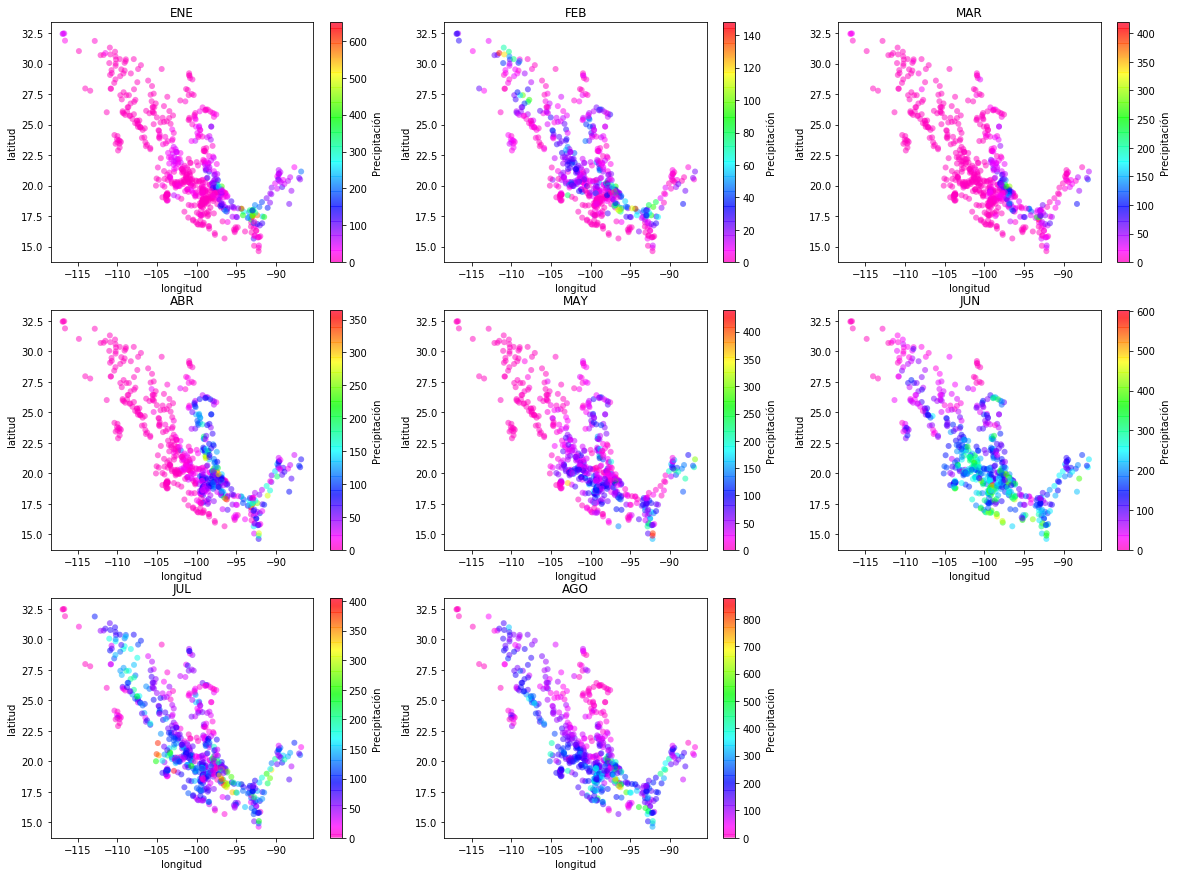

In [92]:
fig = plt.figure(figsize=(20,15))
i = 1
j = 1
for m in mes:
    plt.subplot(3,3,i)
    plt.scatter(np.array(lluvias['Lon'][:'2018']), np.array(lluvias['Lat'][:'2018']), label=None,
            c=np.array(lluvias[m][:'2018']), cmap='gist_rainbow_r', linewidth=0, alpha=0.5)
    plt.title(m,fontsize = 12)
    plt.axis(aspect='equal')
    plt.xlabel('longitud')
    plt.ylabel('latitud')
    i = i+1
    plt.colorbar(label='Precipitación')
plt.savefig('/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/REPORTE_DE_DATOS/TyLL/prec_2018.jpg')

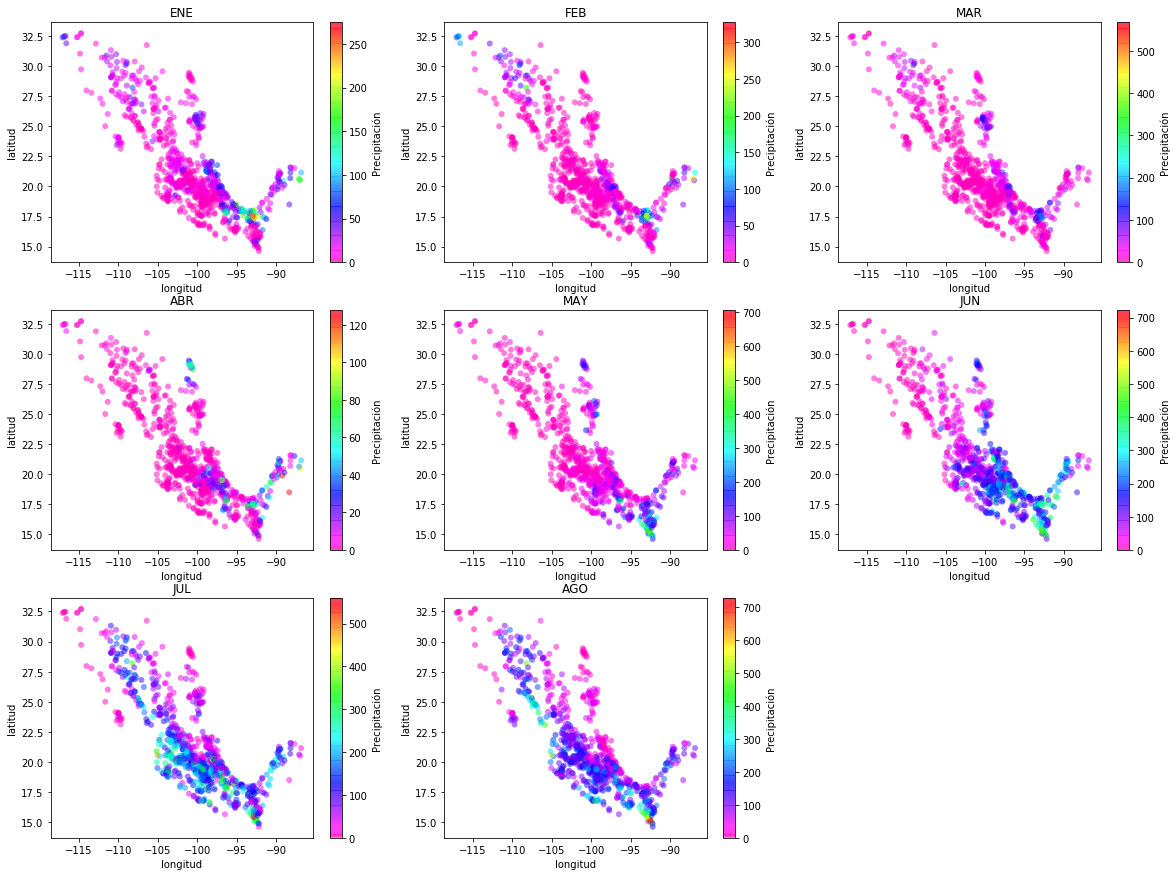

In [93]:
fig = plt.figure(figsize=(20,15))
i = 1
j = 1
for m in mes:
    plt.subplot(3,3,i)
    plt.scatter(np.array(lluvias['Lon']['2019':]), np.array(lluvias['Lat']['2019':]), label=None,
            c=np.array(lluvias[m]['2019':]), cmap='gist_rainbow_r', linewidth=0, alpha=0.5)
    plt.title(m,fontsize = 12)
    plt.axis(aspect='equal')
    plt.xlabel('longitud')
    plt.ylabel('latitud')
    i = i+1
    plt.colorbar(label='Precipitación')
plt.savefig('/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/REPORTE_DE_DATOS/TyLL/prec_2019.jpg')

## TEMPERATURAS

In [94]:
#Cargamos los Datos de los archivos
path_Mx_18 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/CONAGUA/2018/temperaturas/T_max/201801010000TMax.csv'
path_Mm_18 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/CONAGUA/2018/temperaturas/T_med/201801010000TMed.csv'
path_Md_18 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/CONAGUA/2018/temperaturas/T_min/201801010000TMin.csv'
path_Mx_19 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/CONAGUA/2019/Temperaturas/T_max/201901010000TMax.csv'
path_Mm_19 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/CONAGUA/2019/Temperaturas/T_med/201901010000TMed.csv'
path_Md_19 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/CONAGUA/2019/Temperaturas/T_min/201901010000TMin.csv'

In [95]:
Maxima_2018 = pd.read_csv(path_Mx_18,encoding='latin-1')
Minima_2018 = pd.read_csv(path_Mm_18,encoding='latin-1')
Media_2018 = pd.read_csv(path_Md_18,encoding='latin-1')
Maxima_2019 = pd.read_csv(path_Mx_19,encoding='latin-1')
Minima_2019 = pd.read_csv(path_Mm_19,encoding='latin-1')
Media_2019 = pd.read_csv(path_Md_19,encoding='latin-1')

In [104]:
#Unimos todos los datos de Temperatura en una sola base de datos
T_2018 = pd.merge(pd.merge(Media_2018,Maxima_2018),Minima_2018)
T_2019 = pd.merge(pd.merge(Media_2019,Maxima_2019),Minima_2019)
Temperatura = pd.concat([T_2018, T_2019], keys=['2018', '2019'],sort=False)[['Lon', 'Lat', 'Edo', 'Clave', 'Est', 'Tmed','Tmax','Tmin']]

In [107]:
Temperatura['2019':].head()

Lon    Lat   Edo  Clave               Est       Tmed       Tmax  \
2019 0  -99.75  16.76   GRO  76805          ACAPULCO  27.441935  33.277419   
     1 -111.83  30.71   SON  76113             ALTAR  13.462069  20.868966   
     2  -93.90  16.24  CHIS  76840           ARRIAGA  28.088710  34.464516   
     3  -90.50  19.83  CAMP  76695          CAMPECHE  23.374074  29.400000   
     4 -111.65  25.01   BCS  76402  CD. CONSTITUCIÓN  17.987097  27.429032   

             Tmin  
2019 0  21.606452  
     1   6.055172  
     2  21.712903  
     3  17.348148  
     4   8.545161

#### Promedio, desviaciones estándar, media, moda de la distribución. Rango interquartil de la distribución. 

In [97]:
#En Enero 2018
np.round(Temperatura[:'2018'].describe(),2).to_csv('/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/REPORTE_DE_DATOS/TyLL/desribe_2018_tem.csv')

In [98]:
#En Enero 2019
np.round(Temperatura[:'2019'].describe(),2).to_csv('/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/REPORTE_DE_DATOS/TyLL/desribe_2019_tem.csv')

#### Diferencia en el promedio de las temperaturas máxima, mínima y  media entre 2018 y 2019.

In [101]:
np.round(Temperatura[:'2019'].describe()-Temperatura[:'2018'].describe(),2).to_csv('/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/REPORTE_DE_DATOS/TyLL/dif_tem_1819.csv')